In [ ]:
# import zipfile

# # path to your zip file
# zip_path = "/teamspace/studios/this_studio/svpasg/att_faces.zip"

# # destination folder where you want to extract
# extract_to = "/teamspace/studios/this_studio/allll/att_faces"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Extracted successfully to", extract_to)


In [ ]:
from skimage import io, transform
import matplotlib.pyplot as plt
import os
import numpy as np


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

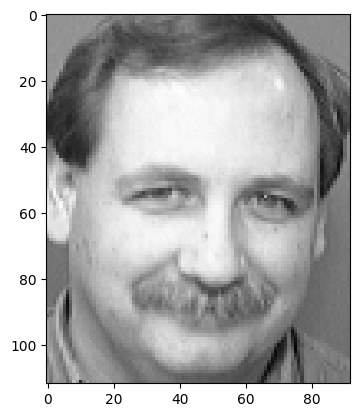

In [ ]:
image = io.imread("/teamspace/studios/this_studio/allll/att_faces/s25/10.pgm") # Replace with your image's path

plt.imshow(image, cmap='gray') # Display the grayscale image
plt.show()

In [ ]:


def load_images_to_numpy(directory):
    """Loads all PGM images from a directory into a NumPy array.

    Args:
      directory: The path to the directory containing the PGM images.

    Returns:
      A NumPy array of shape (num_images, num_pixels) containing the image data,
      or None if there's an error.  Also returns a list of filenames.
    """
    images = []
    filenames = []
    try:
        for i in range(1, 41):  # Assuming 40 classes (s1 to s40)
            class_dir = os.path.join(directory, f"s{i}")
            if not os.path.isdir(class_dir):
                print(f"Warning: Subdirectory 's{i}' not found. Skipping.")
                continue  # Skip if the subdirectory doesn't exist        
            for filename in os.listdir(class_dir):
                if filename.endswith(".pgm"):
                    filepath = os.path.join(class_dir, filename)
                    # print(filepath)
                    try:
                        img = io.imread(filepath, as_gray=True)  # Read as grayscale
                        img_array = img.flatten()  # Flatten to 1D array
                        images.append(img_array)
                        filenames.append(filename)
                    except Exception as e:
                        print(f"Error loading image {filename}: {e}")
                        # Optionally:  Return None to stop processing on error
                        # return None, None
        return np.array(images), filenames
    except FileNotFoundError:
        print(f"Error: Directory '{directory}' not found.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None, None


# Example usage:
image_directory = "/teamspace/studios/this_studio/allll/att_faces" # directory
image_data, filenames = load_images_to_numpy(image_directory)

if image_data is not None:
    print("Image data shape:", image_data.shape)  # C the shape of  data
    # Now 'image_data' is a NumPy array ready for MLP model.
 
else:
    print("Failed to load image data.")

Image data shape: (400, 10304)


In [3]:
print(image_data[1])
print(filenames)

[34 34 33 ... 37 40 33]
['1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '7.pgm', '8.pgm', '9.pgm', '1.pgm', '10.pgm', '2.pgm', '3.pgm', '4.pgm', '5.pgm', '6.pgm', '

In [5]:
def load_image_to_tensor(directory, target_size=(92*112)):
    
    image_train,lables_train=[],[]
    image_test,lables_test=[],[]
    
    try:
        for i in range(1,41):
            count=0
            class_dir=os.path.join(directory,f"s{i}")
            if not os.path.isdir(class_dir):
                print(f"not found s{i},skipping")
                continue
            for filename in os.listdir(class_dir):
                if filename.endswith('.pgm'):
                    filepath=os.path.join(class_dir,filename)
                    try:
                        img=io.imread(filepath,as_gray=True)
                        count+=1
                        if count<8:
                            image_train.append(img.flatten())
                            lables_train.append(i-1)
                        else:
                            image_test.append(img.flatten())  
                            lables_test.append(i-1)  
                        # print(filename)
                    except Exceptionas as e:
                        print(f"Error loading {filename}: {e}")
            # print(len(image_array_tr))
        image_train=(np.array(image_train).astype(np.float32) / 255.0).reshape(len(image_train),target_size )
        image_test=(np.array(image_test).astype(np.float32) / 255.0).reshape(len(image_test),target_size )
            # lables_array_tr=np.array(lables_array_tr).astype(np.float32)          
            # lables_array_ts=np.array(lables_array_tr).astype(np.float32)
        # scaler = StandardScaler()
        # image_array_tr = scaler.fit_transform(image_train)
        # image_array_ts = scaler.fit_transform(image_test)
            # image_train.append( (image_array_tr))
            # image_test.append((image_array_ts))
            # lables_test.append(lables_array_ts)
            # lables_train.append(lables_array_tr)
        
        
        X_tensor_train = torch.tensor(image_train)
        X_tensor_test = torch.tensor(image_test)
        y_tensor_train = torch.nn.functional.one_hot(torch.tensor(lables_train), num_classes=40)
        y_tensor_test =torch.nn.functional.one_hot(torch.tensor(lables_test), num_classes=40)
        return X_tensor_train,X_tensor_test, y_tensor_train,y_tensor_test
    except FileNotFoundError:
        print(f"Error: Directory '{directory}' not found.")
        return None, None,None, None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None, None,None, None

In [6]:
image_directory = "/teamspace/studios/this_studio/allll/att_faces" 
X_tensor_train,X_tensor_test, y_tensor_train,y_tensor_test= load_image_to_tensor(image_directory)

In [7]:
print(len(X_tensor_train))
print(len(y_tensor_train))
print(X_tensor_train[0])

280
280
tensor([0.1882, 0.1922, 0.1765,  ..., 0.1843, 0.1804, 0.1804])


In [8]:
print(X_tensor_train.shape[1])

10304


In [9]:
X_train=[]
for i in range(0,7):
    X_train.append(X_tensor_train[0][i])
print(X_train)

[tensor(0.1882), tensor(0.1922), tensor(0.1765), tensor(0.1843), tensor(0.1922), tensor(0.2235), tensor(0.1529)]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten,Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential, clone_model
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from sklearn.utils import resample
from keras.optimizers import Adam ,SGD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tqdm import tqdm

2025-12-24 15:42:09.679070: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-24 15:42:11.365660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-24 15:42:14.620292: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [11]:
def face_model():
    model1 = Sequential()
    # model1.add(Flatten(input_shape=(28,28)))
    model1.add(Dense(40, activation='softmax',input_shape=(X_tensor_train.shape[1],)))
    # model1.add(Dropout(0.2))
    # model1.add(Dense(64, activation='relu'))
    # model1.add( Dropout(0.2))
    # # model1.add(Dense(16, activation='relu'))
    # model1.add(Dense(40, activation='sigmoid'))
    model1.summary()
    return model1
face_model1=face_model()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-24 15:42:16.598782: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │       412,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,200 (1.57 MB)

 Trainable params: 412,200 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
face_model1.compile(optimizer=SGD(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])
face_model1.fit(X_tensor_train, y_tensor_train,epochs=500,batch_size=32)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0036 - loss: 25.9201     
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0429 - loss: 68.9726  
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0607 - loss: 86.9606  
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0929 - loss: 68.1158 
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1643 - loss: 48.0925 
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2679 - loss: 35.8787 
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3357 - loss: 19.2372 
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4214 - loss: 17.8899 
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5393 - loss: 18.0898 
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6143 - loss: 9.3861  
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6464 - loss: 6.5769 
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

In [13]:
loss1, accuracy1 = face_model1.evaluate(X_tensor_test,y_tensor_test)
print("Loss1:", loss1)
print("Accuracy:", accuracy1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9333 - loss: 0.2324 
Loss1: 0.23236976563930511
Accuracy: 0.9333333373069763


In [14]:
def image_generator(h=112, w=92, channels=1, image_type='black'):
      if image_type == 'black':
        image_data = tf.zeros((1, h * w), dtype=tf.float32)
      elif image_type == 'white':
        image_data = tf.ones((1, h * w), dtype=tf.float32)
      return image_data
image= image_generator()

In [15]:
predictions =face_model1.predict(image)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
38


In [16]:
def process(im_flatten):
    max_value = tf.reduce_max(im_flatten)
    min_value = tf.reduce_min(im_flatten)
    im_flatten = im_flatten - min_value
    im_flatten = im_flatten / (max_value - min_value)
    return im_flatten

In [17]:
# def model_inversion_attack(model,traget_label=24,image_type='black'):
#      image=image_generator(image_type=image_type)
#      v=image
#      predictions =model.predict(image)
#      predictions = np.argmax(predictions, axis = 1)

#      costn_1 = 10
#      b = 0
#      alpha=15000
#      learning_rate=0.01
#      momentum=0.9, 
#      beta=5
#      gama=0.01
#      for i in tqdm(range(alpha), desc="Computing"):
#         with tf.GradientTape() as tape:
#             tape.watch(image)
#             out = face_model1(image) # Use your face_model1
#             # No need to reshape if the output is already (1,40)  Check shape of face_model1 output first.
#             # If you need to reshape, add:
#             # out = tf.reshape(out, (1, class_num))  
#             target_class = tf.constant([traget_label])
#             cost = tf.keras.losses.sparse_categorical_crossentropy(
#                 target_class, out, from_logits=False
#             ) # from_logits=False because softmax is already applied

#         # Compute gradients
#         aim_grad = tape.gradient(cost, image)

#         # Update image using momentum-based SGD
#         v = momentum * v + aim_grad
#         image = image - learning_rate * v

#         # Normalize and clamp
#         image = process(image)
#         image= tf.clip_by_value(image, 0, 1)

#         # Stopping criteria
#         # if cost >= costn_1:
#         #     b += 1
#         #     if b > beta:
#         #         break
#         # else:
#         #     b = 0

#         # costn_1 = cost[0]

#         # if cost[0] < gama:
#         #     break
    
#      predictions =model.predict(image)
#      predictions = np.argmax(predictions, axis = 1)
#      return image

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# OUT_DIR = "./inverted"
# os.makedirs(OUT_DIR, exist_ok=True)

# height = 112
# width = 92
# num_classes = 40

# for target_label in range(num_classes):

#     image = model_inversion_attack(
#         model=face_model1,
#         traget_label=target_label
#     )

#     # TensorFlow EagerTensor → NumPy
#     image_array = image.numpy().reshape(height, width)

#     # Display (optional)
#     plt.imshow(image_array, cmap='gray')
#     plt.title(f'Generated Image - Class {target_label}')
#     plt.axis('off')
#     # plt.show()

#     # Save
#     save_path = os.path.join(OUT_DIR, f"class_{target_label}.png")
#     plt.imsave(save_path, image_array, cmap='gray')

# print("✅ All 40 classes generated & saved.")


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io

# ORIG_DIR = "/teamspace/studios/this_studio/allll/att_faces"   
# GEN_DIR = "./inverted"         
# OUT_DIR = "./visual_sets"

# os.makedirs(OUT_DIR, exist_ok=True)

# H, W = 112, 92
# NUM_CLASSES = 40
# SETS = 4         
# IMAGES_PER_SET = 80

# for set_idx in range(SETS):
#     images = []

#     for cls in range(1, NUM_CLASSES + 1):
#         class_dir = os.path.join(ORIG_DIR, f"s{cls}")
#         orig_files = sorted([
#             f for f in os.listdir(class_dir) if f.endswith(".pgm")
#         ])

#         # pick different originals per set
#         orig_img = io.imread(
#             os.path.join(class_dir, orig_files[set_idx]),
#             as_gray=True
#         )
#         images.append(orig_img)

#         # generated image
#         gen_path = os.path.join(GEN_DIR, f"class_{cls-1}.png")
#         gen_img = io.imread(gen_path, as_gray=True)
#         images.append(gen_img)

#     # ---------- plotting ----------
#     fig, axes = plt.subplots(10, 8, figsize=(16, 20))
#     axes = axes.flatten()

#     for ax, img in zip(axes, images):
#         ax.imshow(img, cmap="gray")
#         ax.axis("off")

#     plt.tight_layout()
#     save_path = os.path.join(OUT_DIR, f"visual_set_{set_idx+1}.png")
#     plt.savefig(save_path, dpi=300)
#     plt.close()

#     print(f"✅ Saved {save_path}")


In [ ]:

def model_inversion_attack(model, target_label=24, image_type='black', optimizer='adam', alpha=15000):
    """
    Model inversion attack with multiple optimizer options.
    
    Args:
        model: The target model
        target_label: Target class label
        image_type: Initial image type
        optimizer: One of ['sgd', 'nesterov', 'adagrad', 'rmsprop', 'adam', 'adamw', 'adabelief', 'lbfgs']
        alpha: Number of iterations
    """
    
    # Initialize image as TensorFlow variable
    initial_image = image_generator(image_type=image_type)
    image = tf.Variable(initial_image, dtype=tf.float32)
    
    # Hyperparameters
    learning_rate = 0.01
    beta = 5
    gamma = 0.01
    
    # Initialize optimizer
    if optimizer.lower() == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
    
    elif optimizer.lower() == 'nesterov':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    
    elif optimizer.lower() == 'adagrad':
        opt = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
    
    elif optimizer.lower() == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, momentum=0.9)
    
    elif optimizer.lower() == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    
    elif optimizer.lower() == 'adamw':
        opt = tf.keras.optimizers.AdamW(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, weight_decay=0.01)
    
    elif optimizer.lower() == 'adabelief':
        try:
            import tensorflow_addons as tfa
            opt = tfa.optimizers.AdaBelief(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
        except ImportError:
            print("AdaBelief requires tensorflow-addons. Install: pip install tensorflow-addons")
            print("Falling back to Adam optimizer")
            opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    elif optimizer.lower() == 'lbfgs':
        return model_inversion_attack_lbfgs(model, target_label, image_type, alpha)
    
    else:
        raise ValueError(f"Unknown optimizer: {optimizer}")
    
    # Training loop
    cost_n_1 = 10
    b = 0
    target_class = tf.constant([target_label])
    
    for i in tqdm(range(alpha), desc=f"Computing with {optimizer}"):
        with tf.GradientTape() as tape:
            out = model(image, training=False)
            cost = tf.keras.losses.sparse_categorical_crossentropy(
                target_class, out, from_logits=False
            )
        
        # Compute gradients
        gradients = tape.gradient(cost, [image])
        
        # Apply optimizer
        opt.apply_gradients(zip(gradients, [image]))
        
        # Normalize and clamp (keep as tensor operations)
        image.assign(process(image))
        image.assign(tf.clip_by_value(image, 0, 1))
        
        # Optional stopping criteria
        # if cost >= cost_n_1:
        #     b += 1
        #     if b > beta:
        #         break
        # else:
        #     b = 0
        # cost_n_1 = cost
        # if cost < gamma:
        #     break
    
    # Final prediction
    predictions = model.predict(image)
    predictions = np.argmax(predictions, axis=1)
    print(f"Final prediction: {predictions[0]}, Target: {target_label}")
    
    # Return as TensorFlow tensor (no .numpy())
    return image


def model_inversion_attack_lbfgs(model, target_label=24, image_type='black', max_iter=15000):
    """
    Model inversion attack using L-BFGS optimizer.
    """
    import tensorflow_probability as tfp
    
    # Initialize image
    initial_image = image_generator(image_type=image_type)
    image = tf.Variable(initial_image, dtype=tf.float32)
    target_class = tf.constant([target_label])
    
    # Define loss and gradient function
    def loss_and_gradient(img):
        img = tf.reshape(img, image.shape)
        with tf.GradientTape() as tape:
            tape.watch(img)
            out = model(img, training=False)
            loss = tf.keras.losses.sparse_categorical_crossentropy(
                target_class, out, from_logits=False
            )
            loss = tf.reduce_sum(loss)
        
        gradients = tape.gradient(loss, img)
        return loss, tf.reshape(gradients, [-1])
    
    # Flatten image for L-BFGS
    init_image = tf.reshape(image, [-1])
    
    # Run L-BFGS optimization
    results = tfp.optimizer.lbfgs_minimize(
        loss_and_gradient,
        initial_position=init_image,
        max_iterations=max_iter,
        tolerance=1e-8
    )
    
    # Reshape back to image
    optimized_image = tf.reshape(results.position, image.shape)
    optimized_image = process(optimized_image)
    optimized_image = tf.clip_by_value(optimized_image, 0, 1)
    
    # Final prediction
    predictions = model.predict(optimized_image)
    predictions = np.argmax(predictions, axis=1)
    print(f"Final prediction: {predictions[0]}, Target: {target_label}")
    

    return optimized_image




# Usage examples:
"""
# SGD with momentum
image_sgd = model_inversion_attack(model, target_label=24, optimizer='sgd')

# Nesterov SGD
image_nesterov = model_inversion_attack(model, target_label=24, optimizer='nesterov')

# Adagrad
image_adagrad = model_inversion_attack(model, target_label=24, optimizer='adagrad')

# RMSprop
image_rmsprop = model_inversion_attack(model, target_label=24, optimizer='rmsprop')

# Adam
image_adam = model_inversion_attack(model, target_label=24, optimizer='adam')

# AdamW
image_adamw = model_inversion_attack(model, target_label=24, optimizer='adamw')

# AdaBelief (requires tensorflow-addons)
image_adabelief = model_inversion_attack(model, target_label=24, optimizer='adabelief')

# L-BFGS (requires tensorflow-probability)
image_lbfgs = model_inversion_attack(model, target_label=24, optimizer='lbfgs')
"""

"\n# SGD with momentum\nimage_sgd = model_inversion_attack(model, target_label=24, optimizer='sgd')\n\n# Nesterov SGD\nimage_nesterov = model_inversion_attack(model, target_label=24, optimizer='nesterov')\n\n# Adagrad\nimage_adagrad = model_inversion_attack(model, target_label=24, optimizer='adagrad')\n\n# RMSprop\nimage_rmsprop = model_inversion_attack(model, target_label=24, optimizer='rmsprop')\n\n# Adam\nimage_adam = model_inversion_attack(model, target_label=24, optimizer='adam')\n\n# AdamW\nimage_adamw = model_inversion_attack(model, target_label=24, optimizer='adamw')\n\n# AdaBelief (requires tensorflow-addons)\nimage_adabelief = model_inversion_attack(model, target_label=24, optimizer='adabelief')\n\n# L-BFGS (requires tensorflow-probability)\nimage_lbfgs = model_inversion_attack(model, target_label=24, optimizer='lbfgs')\n"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Final prediction: 0, Target: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Final prediction: 1, Target: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Final prediction: 2, Target: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Final prediction: 3, Target: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Final prediction: 4, Target: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Final prediction: 5, Target: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Final prediction: 6, Target: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Final prediction: 7, Target: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Final prediction: 8, Target: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Final prediction: 9, Target: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Final prediction: 10, Target: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Final prediction: 11, Target: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Final prediction: 12, Target: 12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Final prediction: 13, Target: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Final prediction: 14, Target: 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Final prediction: 15, Target: 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Final prediction: 16, Target: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Final prediction: 17, Target: 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Final prediction: 18, Target: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Final prediction: 19, Target: 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Final prediction: 20, Target: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Final prediction: 21, Target: 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Final prediction: 22, Target: 22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Final prediction: 23, Target: 23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Final prediction: 24, Target: 24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Final prediction: 25, Target: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Final prediction: 26, Target: 26
1/1 ━━

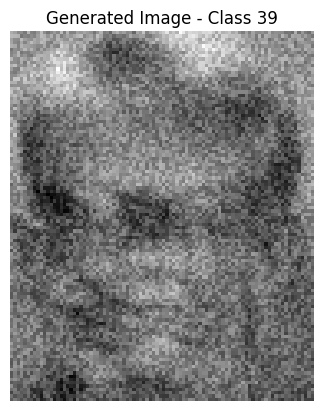

In [ ]:


OUT_DIR = "./inverted"
os.makedirs(OUT_DIR, exist_ok=True)

height = 112
width = 92
num_classes = 40
opt=['sgd','nesterov','adagrad','rmsprop','adam','adamw','adabelief','lbfgs']
opt=['lbfgs']
for opts in opt:
    optimizer_dir = os.path.join(OUT_DIR, opts)
    os.makedirs(optimizer_dir, exist_ok=True)
    for target_label in range(num_classes):
        image = model_inversion_attack(model=face_model1, target_label=target_label, optimizer=opts, alpha=10000)

        # TensorFlow EagerTensor → NumPy
        image_array = image.numpy().reshape(height, width)

        # Display (optional)
        plt.imshow(image_array, cmap='gray')
        plt.title(f'Generated Image - Class {target_label}')
        plt.axis('off')
        # plt.show()

        # Save
        save_path = os.path.join(optimizer_dir, f"class_{target_label}_{opts}.png")
        plt.imsave(save_path, image_array, cmap='gray')

print("✅ All 40 classes generated & saved.")


In [ ]:


ORIG_DIR = "/teamspace/studios/this_studio/allll/att_faces"   
GEN_DIR = "./inverted"         
OUT_DIR = "./visual_sets"

os.makedirs(OUT_DIR, exist_ok=True)

H, W = 112, 92
NUM_CLASSES = 40
SETS = ['sgd','nesterov','adagrad','rmsprop','adam','adamw','adabelief','lbfgs']        
IMAGES_PER_SET = 80

for set_idx, optimizer_name in enumerate(SETS):
    images = []

    for cls in range(1, NUM_CLASSES + 1):
        class_dir = os.path.join(ORIG_DIR, f"s{cls}")
        orig_files = sorted([
            f for f in os.listdir(class_dir) if f.endswith(".pgm")
        ])

        # pick different originals per set
        orig_img = io.imread(
            os.path.join(class_dir, orig_files[set_idx]),
            as_gray=True
        )
        images.append(orig_img)

        # generated image
        gen_path = os.path.join(GEN_DIR, optimizer_name, f"class_{cls-1}_{optimizer_name}.png")
        gen_img = io.imread(gen_path, as_gray=True)
        images.append(gen_img)

    # ---------- plotting ----------
    fig, axes = plt.subplots(10, 8, figsize=(16, 20))
    axes = axes.flatten()

    for ax, img in zip(axes, images):
        ax.imshow(img, cmap="gray")
        ax.axis("off")

    plt.tight_layout()
    save_path = os.path.join(OUT_DIR, f"visual_set_{set_idx+1}.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"✅ Saved {save_path}")


✅ Saved ./visual_sets/visual_set_1.png
✅ Saved ./visual_sets/visual_set_2.png
✅ Saved ./visual_sets/visual_set_3.png
✅ Saved ./visual_sets/visual_set_4.png
✅ Saved ./visual_sets/visual_set_5.png
✅ Saved ./visual_sets/visual_set_6.png
✅ Saved ./visual_sets/visual_set_7.png
✅ Saved ./visual_sets/visual_set_8.png
